In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
dataset = pd.read_csv('E://Gaurav/ML_Dataset/K Means/MAll_Customers.csv')
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
""""Clients subscribe to membership card. They provide some info and they use this card for shopping and hence we got Spending score (1-100).
So we create segments here. """"

In [17]:
x = dataset.iloc[:,[3,4]].values


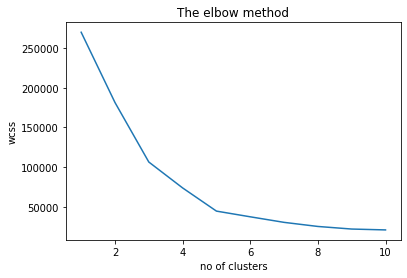

In [7]:
#Now we need to find out the optimal number of clusters
#using ELBOW method

from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init  = 10 , random_state = 0) # seed = 0 -> all same results; n_clusters - the number of clusters we need to select ; init - method of initialisation (as by default to get the optimal number of clusters , we use the method kmeans++) ;  
    kmeans.fit(x)
    wcss.append(kmeans.inertia_) # calculate within s clusters sum of squares - we use built in method - INERTIA
plt.plot(range(1,11),wcss)
plt.title('The elbow method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()
    


In [9]:
# now applying k means algorithm with no of clusters = 5

kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init  = 10 , random_state = 0)

#now we will use FIT_PREDICT() method which will tell for every point that it predicts that to which class it belongs

y_kmeans = kmeans.fit_predict(x)
y_kmeans

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

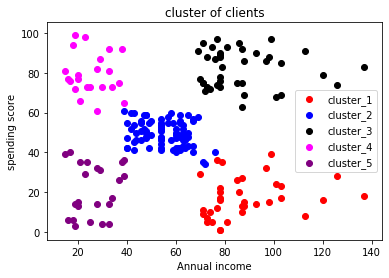

In [15]:
# visualizing the clusters

plt.scatter(x[y_kmeans == 0,0], x[y_kmeans == 0,1], c = 'red', label = 'cluster_1')
plt.scatter(x[y_kmeans == 1,0], x[y_kmeans == 1,1], c = 'blue', label = 'cluster_2')
plt.scatter(x[y_kmeans == 2,0], x[y_kmeans == 2,1], c = 'black', label = 'cluster_3')
plt.scatter(x[y_kmeans == 3,0], x[y_kmeans == 3,1], c = 'magenta', label = 'cluster_4')
plt.scatter(x[y_kmeans == 4,0], x[y_kmeans == 4,1], c = 'purple', label = 'cluster_5')

# we did like this because number of clusters starts with 0 to 4 (so total 5), hence we need to do this 5;
# Also, x[y_kmeans == 0,0] - this means for first x axis - we give input as y_kmeans for 1st cluster  and 1st column of data x
# Similarly ,x[y_kmeans == 0,1] means for 1st cluster, and 2nd column of x array. 

plt.title('cluster of clients')
plt.xlabel('Annual income')
plt.ylabel('spending score')
plt.legend()
plt.show()

# on careful analysis , we see the 5 clusters taht are formed can be labeled as : 
#1. cluster_1  -> careful
#2. cluster_2  -> standard
#3. cluster_3  -> target
#4. cluster_4  -> careless
#5. cluster_5  -> Sensible